In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sign(x):
    if x > 0:
        return 1
    else:
        return -1 

In [3]:
def data_generator(data_size):
    data = np.zeros((data_size, 2))
    for i in range(data_size):
        data[i][0] = random.uniform(-1, 1)
        if random.uniform(0, 1) <= 0.2: # noise flips the result with 20% probability
            data[i][1] = -1.0 * sign(data[i][0])
        else:
            data[i][1] = sign(data[i][0])
    return data

In [4]:
def decision_stump(data):
    data = data[np.argsort(data[:, 0])] 
    min_E_in = 1.0
    h= {"s": 0, "theta": 0}

    for s in [-1,1]:
        for i in range(len(data) + 1):
            if i == 0:
                theta = -1.0
            elif i == len(data):
                theta = 1.0
            else:
                theta = (data[i][0] + data[i-1][0]) / 2

            hx = []
            for j in range(len(data)):
                predict = s * sign(data[j][0] - theta)
                hx.append(predict)
            
            err_rate = np.mean(hx != data[:, 1]) #element-wise comparison
            if err_rate < min_E_in:
                min_E_in = err_rate
                h["s"] = s
                h["theta"] = theta

    E_out = 0.5 + 0.3 * h["s"] * (abs(h["theta"]) - 1)

    return min_E_in, E_out


In [5]:
Iter = 1000
data_size = 20
E_in_out = np.zeros((Iter, 2))
for i in range(Iter):
    data = data_generator(data_size)
    E_in_out[i][0], E_in_out[i][1] = decision_stump(data)

diff = E_in_out[:, 0] - E_in_out[:, 1]
avg_E_in = sum(E_in_out[:, 0]) / Iter
avg_E_out = sum(E_in_out[:, 1]) / Iter

Average_E_in = 0.172150
Average_E_out = 0.261397
Ein-Eout= -0.08924698767773112


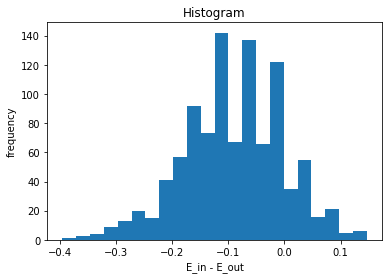

In [6]:
print("Average_E_in = %lf" % avg_E_in)
print("Average_E_out = %lf" % avg_E_out)
print("Ein-Eout=",(avg_E_in-avg_E_out))
plt.hist(diff, bins='auto')
plt.title('Histogram')
plt.xlabel('E_in - E_out')
plt.ylabel('frequency')
plt.show()